**NAME : RANJITH K**

**IMPORT LIBRARIES**

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**EXPLORATORY DATA ANALYSIS**


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
is_Exited = df["Exited"].value_counts()
print("Yes: ",is_Exited[1])
print("No: ",is_Exited[0])

Yes:  2037
No:  7963


In [7]:
print(df.isna().sum().sum())
print(df.duplicated().sum())

0
0


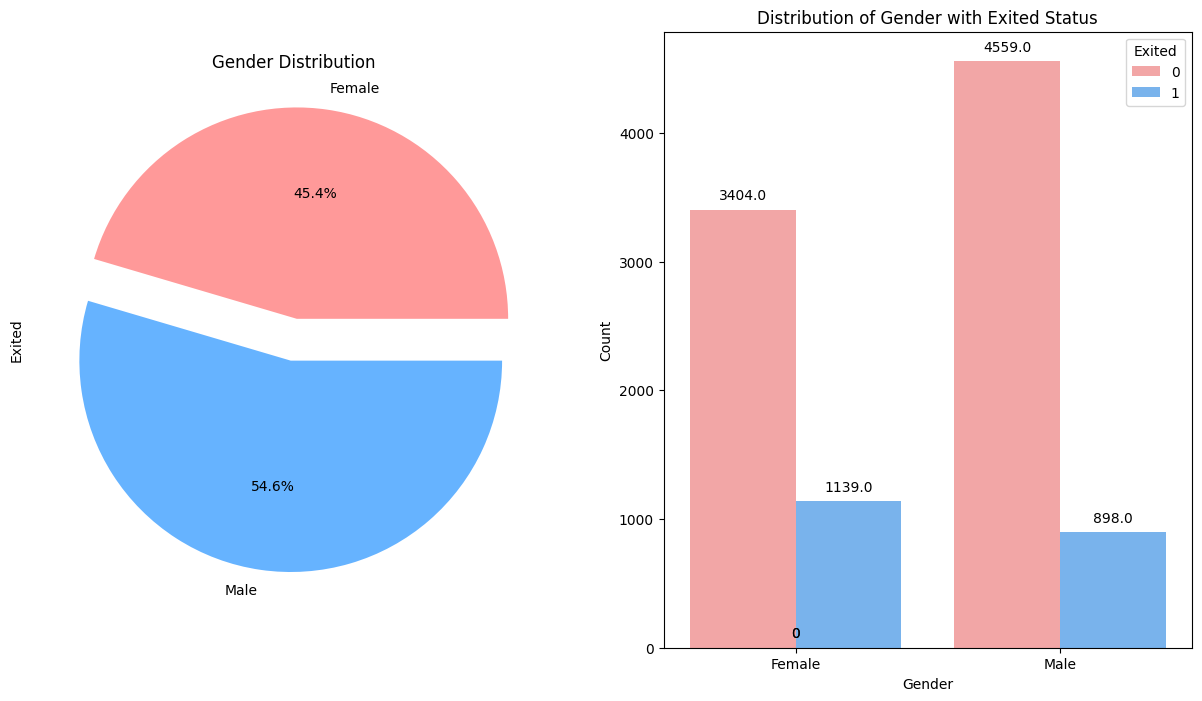

In [8]:
fig, axb = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))

# Gender Distribution Pie Chart
explode = [0.1, 0.1]
colors_pie = ['#ff9999', '#66b3ff']
df.groupby('Gender')['Exited'].count().plot.pie(explode=explode, autopct="%1.1f%%", colors=colors_pie, ax=axb[0])
axb[0].set_title('Gender Distribution')

# Gender Distribution Count Plot
colors_bar = ['#ff9999', '#66b3ff']
ax = sns.countplot(x="Gender", hue="Exited", data=df, ax=axb[1], palette=colors_bar)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
axb[1].set_title("Distribution of Gender with Exited Status")
axb[1].set_xlabel("Gender")
axb[1].set_ylabel("Count")

# Show the plot
plt.show()


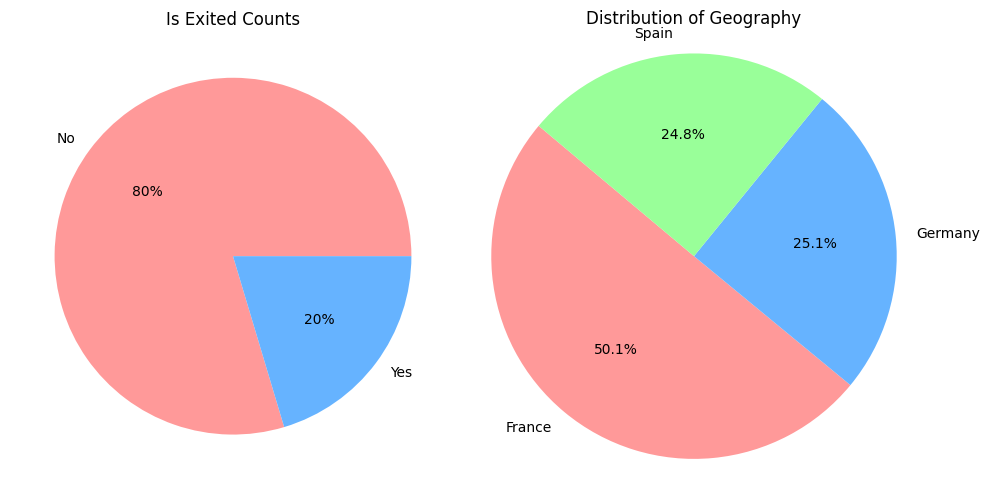

In [9]:
# Exited Counts Pie Chart
is_Exited = df["Exited"].value_counts()
plt.figure(figsize=(10, 5))  # Set the same figsize for both plots

# Subplot for the Exited Counts pie chart
plt.subplot(1, 2, 1)
colors_exited = ['#ff9999', '#66b3ff']
plt.pie(is_Exited, labels=["No", "Yes"], autopct="%0.0f%%", colors=colors_exited)
plt.title("Is Exited Counts")

# Subplot for the Distribution of Geography pie chart
plt.subplot(1, 2, 2)
geography_counts = df['Geography'].value_counts()
colors_geography = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_geography)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Geography')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


<Axes: xlabel='Geography', ylabel='count'>

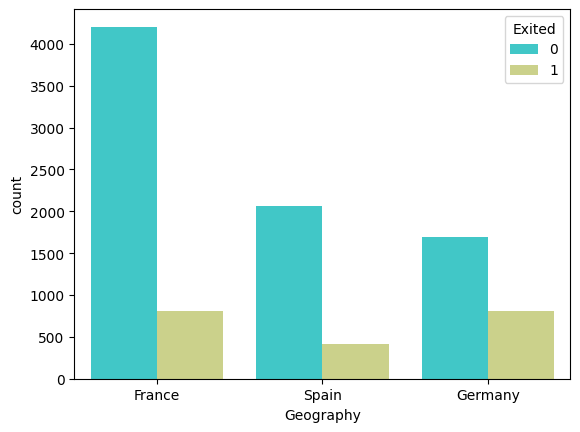

In [10]:
sns.countplot(x='Geography',hue='Exited',data=df, palette='rainbow')

**DATA PREPROCESSING**

In [11]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)

df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

In [12]:
le = LabelEncoder()
# Fit and transform the data
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0
4,850,2,0,43,2,125510,1,1,1,79084,0


**TRAINING AND TESTING PHASE**

In [13]:
No_class = df[df["Exited"]==0]
yes_class = df[df["Exited"]==1]

No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)

X = down_samples.drop("Exited", axis=1)
y = down_samples["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

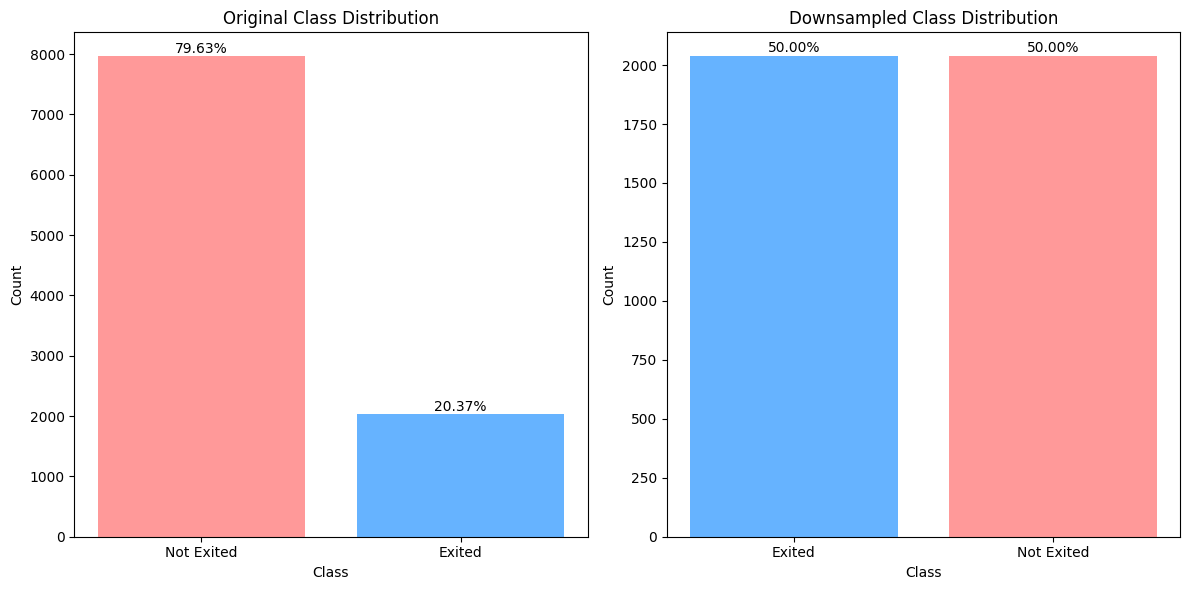

In [14]:
# Count the occurrences of each class in the original dataset
original_class_counts = df["Exited"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts = down_samples["Exited"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(df) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['#ff9999', '#66b3ff'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['Not Exited', 'Exited'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['#ff9999', '#66b3ff'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['Not Exited', 'Exited'])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


**DECISION TREE CLASSIFIER**

In [15]:
DT = DecisionTreeClassifier(max_depth=(5), random_state=0)
DT.fit(X_train, y_train)
predict_ID3 = DT.predict(X_test)
print(classification_report(y_test, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       410
           1       0.84      0.69      0.76       405

    accuracy                           0.78       815
   macro avg       0.79      0.78      0.78       815
weighted avg       0.79      0.78      0.78       815

ID3 model accuracy is: 78.04%


**LOGISTIC REGRESSION MODEL**

In [16]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       410
           1       0.71      0.71      0.71       405

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815

Logistic Regression accuracy is: 71.17%


**SUPPORT VECTOR MACHINE**

In [17]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
predict = svm_model.predict(X_test)

print(classification_report(y_test, predict))
svm_accuracy = accuracy_score(predict,y_test)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       410
           1       0.71      0.70      0.71       405

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815

SVC model accuracy is: 71.04%


**RANDOM FOREST CLASSIFIER**

In [18]:
RF = RandomForestClassifier(n_estimators=60, random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       410
           1       0.81      0.78      0.80       405

    accuracy                           0.80       815
   macro avg       0.80      0.80      0.80       815
weighted avg       0.80      0.80      0.80       815

Random Forest model accuracy is: 80.00%


**XG BOOST CLASSIFIER**

In [19]:
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)

# Make predictions on the test set
predict_XGB = XGB.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       410
           1       0.80      0.75      0.77       405

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815

XGBoost model accuracy is: 78.16%


In [20]:
Algorithms = ['Random Forest', 'XGB', 'ID3', 'Logistic Regression', 'SVC']
accuracy = [RF_accuracy, XGB_accuracy, ID3_accuracy, LR_accuracy, svm_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,Random Forest,0.800000
1,XGB,0.781595
2,ID3,0.780368
3,Logistic Regression,0.711656
4,SVC,0.710429


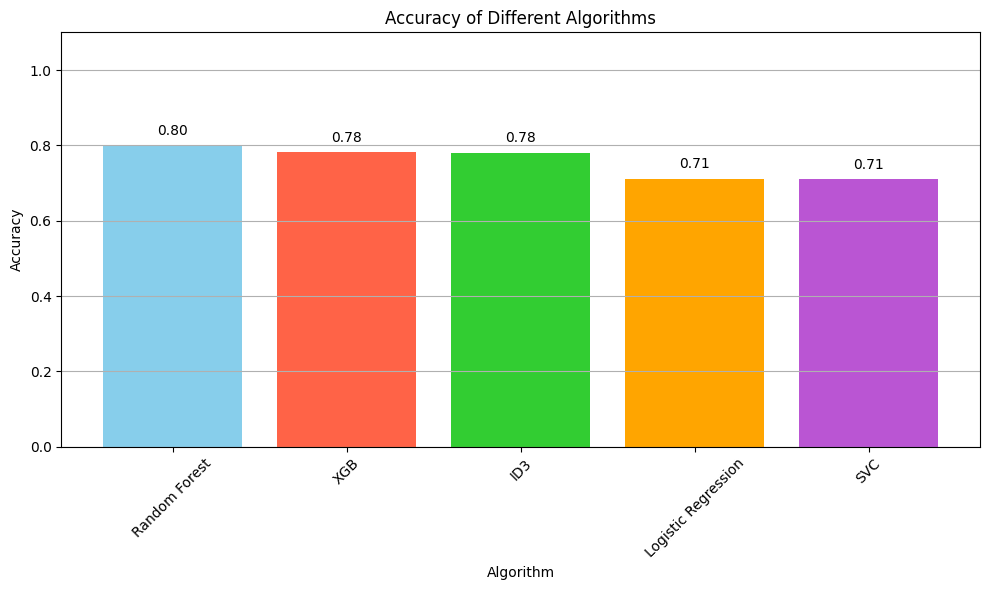

In [21]:
plt.figure(figsize=(10, 6))  # Adjusted figsize for better readability

# Define custom colors
colors = ['skyblue', 'tomato', 'limegreen', 'orange', 'mediumorchid']

# Plot the bar chart with custom colors
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color=colors)

# Add text labels for accuracy values on top of the bars
for i, value in enumerate(FinalResult['Accuracy']):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1.1)  # Slightly increased y-limit to accommodate text labels
plt.xticks(rotation=45)
plt.grid(axis='y')  # Changed grid to y-axis for better readability
plt.tight_layout()
plt.show()
